<a href="https://colab.research.google.com/github/ajayn3300/ML-Capstone-Unsupervised---Clustering/blob/main/Online_Retail_Customer_Segmentation_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Extraction/identification of major topics & themes discussed in news articles. </u></b>

## <b> Problem Description </b>

### In this project, your task is to identify major customer segments on a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

## <b> Data Description </b>

### <b>Attribute Information: </b>

* ### InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.
* ### StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.
* ### Description: Product (item) name. Nominal.
* ### Quantity: The quantities of each product (item) per transaction. Numeric.
* ### InvoiceDate: Invice Date and time. Numeric, the day and time when each transaction was generated.
* ### UnitPrice: Unit price. Numeric, Product price per unit in sterling.
* ### CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.
* ### Country: Country name. Nominal, the name of the country where each customer resides.

In [48]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [49]:
#libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

#necessary libraries will be imported as per requirement

# Importing file

In [50]:
#importing data
data=pd.read_excel('/content/drive/MyDrive/Copy of Online_Retail.xlsx')

# get to know about data : 

In [51]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [52]:
#data shape
data.shape

(541909, 8)

      Approx 5.5 lakh data points and 8 features

In [53]:
# description of data
data.describe([0.25,.50,0.75,0.90,0.95])

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
90%,24.000000,7.950000,17719.000000
95%,29.000000,9.950000,17905.000000
max,80995.000000,38970.000000,18287.000000


In [54]:
#info of the data 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [55]:
# Total numbers of customers
data['CustomerID'].nunique()

4372

In [56]:
# data of time period we have
print('The data we have is from  {}  to  {}'.format(data['InvoiceDate'].min(),data['InvoiceDate'].max()))

The data we have is from  2010-12-01 08:26:00  to  2011-12-09 12:50:00


# ***Data Wrangling and Creating Data Pipelines   :***

In [57]:
# checking null values
data.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [58]:
#let's check out these null values
data[data['Description'].isna()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.0,NaN,United Kingdom
1970,536545,21134,NaN,1,2010-12-01 14:32:00,0.0,NaN,United Kingdom
1971,536546,22145,NaN,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1972,536547,37509,NaN,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1987,536549,85226A,NaN,1,2010-12-01 14:34:00,0.0,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
535322,581199,84581,NaN,-2,2011-12-07 18:26:00,0.0,NaN,United Kingdom
535326,581203,23406,NaN,15,2011-12-07 18:31:00,0.0,NaN,United Kingdom
535332,581209,21620,NaN,6,2011-12-07 18:35:00,0.0,NaN,United Kingdom
536981,581234,72817,NaN,27,2011-12-08 10:33:00,0.0,NaN,United Kingdom


    Let's remove this first

In [59]:
#remove null values with Description
data=data[~data['Description'].isna()]

#Let's check
data[data['Description'].isna()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


In [60]:
# Let's check null values in customerID
data[data['CustomerID'].isna()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,2010-12-01 14:32:00,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,2010-12-01 14:32:00,1.66,NaN,United Kingdom
1447,536544,21790,VINTAGE SNAP CARDS,9,2010-12-01 14:32:00,1.66,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
541536,581498,85099B,JUMBO BAG RED RETROSPOT,5,2011-12-09 10:26:00,4.13,NaN,United Kingdom
541537,581498,85099C,JUMBO BAG BAROQUE BLACK WHITE,4,2011-12-09 10:26:00,4.13,NaN,United Kingdom
541538,581498,85150,LADIES & GENTLEMEN METAL SIGN,1,2011-12-09 10:26:00,4.96,NaN,United Kingdom
541539,581498,85174,S/4 CACTI CANDLES,1,2011-12-09 10:26:00,10.79,NaN,United Kingdom


In [61]:
# Let's remove null values in Customer ID
data=data[~data['CustomerID'].isna()]

In [62]:
# Let's check null values again
data.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

    NUll  values settled

In [63]:
data.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


***Changing Negative Quantity to positive :***

In [64]:
# negative quantity to positive 
data['Quantity']=abs(data['Quantity'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


# Anomaly Detection

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


['UnitPrice', 'Quantity']


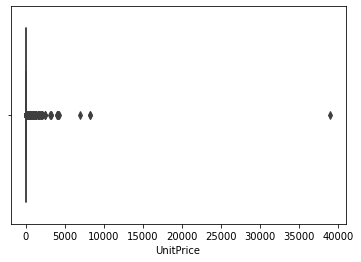

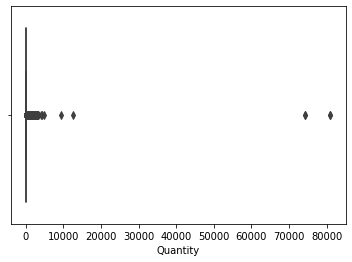

In [65]:
# outliers 
x_names=['UnitPrice','Quantity']
print(x_names)
for i,j in enumerate(x_names):
  plt.figure(i+1)
  sns.boxplot(data[j])

    This is based on univariate analysis,but we need to remove anomalies based on multivariate

In [66]:
# Anomalies detection
from sklearn.ensemble import IsolationForest       #

# initiating model class
detector=IsolationForest(n_estimators=100,max_samples='auto',contamination=0.1,max_features=2)

# fit_transform
detector.fit(data[x_names])



/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"


IsolationForest(contamination=0.1, max_features=2)

In [67]:
#adding columns which will tell if the that data point is anomaly or not
data['iforest']=detector.predict(data[x_names])

In [68]:
# Let's see  sample
data.sample()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,iforest
171278,551400,22149,FELTCRAFT 6 FLOWER FRIENDS,12,2011-04-28 13:18:00,2.1,17160.0,United Kingdom,1


In [69]:
# Let's remove datapoint with values negative one
data=data[data['iforest']!=-1]

In [70]:
# sample
data.sample()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,iforest
362037,568402,21888,BINGO SET,4,2011-09-27 10:34:00,3.75,16629.0,United Kingdom,1


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


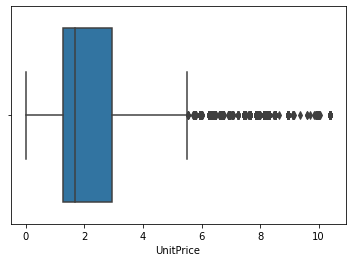

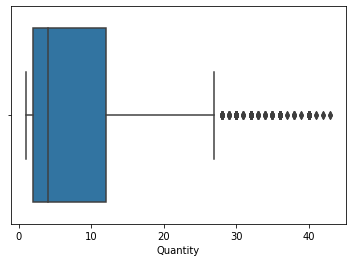

In [71]:
# Let's plot features again
for i,j in enumerate(x_names):
  plt.figure(i+1)
  sns.boxplot(data[j])

    See , now  we have better graphs 

In [72]:
# remvoing i forest column
data.drop(columns=['iforest'],inplace=True)

In [73]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


# Data Scaling


In [74]:
# first lets save our numeric columns

#let's scale data
from sklearn.preprocessing import StandardScaler        # library 

# initiate class 
scaler=StandardScaler()

#fit_transform
x=scaler.fit_transform(data[x_names])


In [75]:
#let's check x
x

array([[ 0.01187631, -0.18047332],
       [ 0.40898463, -0.18047332],
       [ 0.10642591,  0.09640218],
       ...,
       [ 0.76827312, -0.45734882],
       [ 0.76827312, -0.45734882],
       [ 1.14647153, -0.59578657]])

# **Splitting data into train and test**

In [76]:
# train test split library
from sklearn.model_selection import train_test_split

#split
train,test=train_test_split(x,test_size=0.2,random_state=0)

In [77]:
train.shape

(293036, 2)

In [78]:
test.shape

(73260, 2)

# ***Let's cluster  :>***


In [79]:
# library
from sklearn.cluster import KMeans

#initiate model
clusterer=KMeans()

#fit
clusterer.fit(train)

KMeans()

In [80]:
# Let,s predict
clusters=clusterer.predict(train)

In [81]:
#clusters
set(clusters)

{0, 1, 2, 3, 4, 5, 6, 7}

          We have 8 clusters here

# **Let's find out the best numbers of cluster**


We will iterate some number of cluster and with the help of elbow method ,we will select best numbers of cluster 

In [82]:
# we will iterate over 10 cluster and see the inertia score

inertia=[]        # for saving inertia score at every cluster

for i in range(1,11):
  kmeans=KMeans(n_clusters=i)
  kmeans.fit(train)
  inertia.append(kmeans.inertia_) 


In [83]:
inertia

[586029.2955610373,
 337184.04434894904,
 171966.5395324832,
 106687.72558161948,
 65566.83234738339,
 52424.16315466825,
 45602.65710340443,
 39250.081117090216,
 34781.582337355816,
 31303.324515008386]

      let's plot for best cluster picking 

Text(0.5, 0, '<<<< No.of Clusters >>>>')

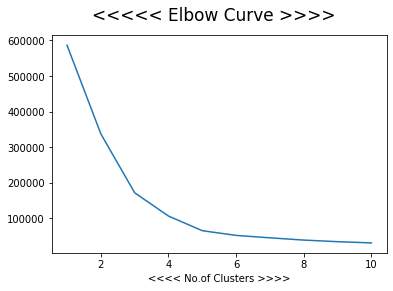

In [84]:
plt.plot(range(1,11),inertia)
plt.suptitle('<<<<< Elbow Curve >>>>',fontsize=17)
plt.xlabel('<<<< No.of Clusters >>>>')


       The best no. of clusters is  3,let's apply it again

In [85]:
#intiate class with 5 clusters
model=KMeans(n_clusters=3)   #initiating model with 5 clusters
model.fit(train)  #fit

KMeans(n_clusters=3)

In [86]:
#train preds
train_preds=model.predict(train)

#test preds
test_preds=model.predict(test)

In [87]:
# converting to dataframe
train=pd.DataFrame(train)

#adding column names
train.columns=x_names

# adding clusters columns to train dataframe
train['clusters']=train_preds

In [88]:
# converting to dataframe
test=pd.DataFrame(test)

#adding column names
test.columns=x_names

# adding clusters columns to train dataframe
test['clusters']=test_preds

In [89]:
# joining both test and train
new=pd.concat([train,test])

Text(0.5, 1.0, '<<<<< Train Data >>>>>>')

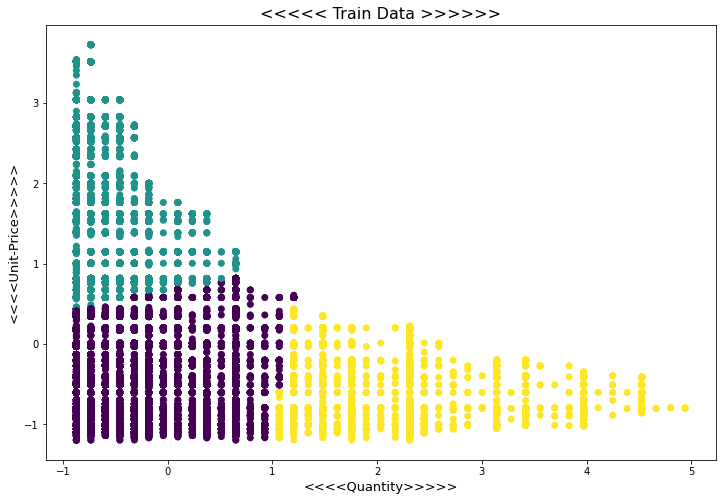

In [98]:
#plotting   for train data
plt.figure(figsize=(12,8))
plt.scatter(train['Quantity'],train['UnitPrice'],c=train['clusters'])
plt.xlabel('<<<<Quantity>>>>>',fontsize=13)
plt.ylabel('<<<<Unit-Price>>>>>',fontsize=13)
plt.title('<<<<< Train Data >>>>>>',fontsize=16)

        You can see 3 groups of customers

Text(0.5, 1.0, '<<<<< Test Data >>>>>>')

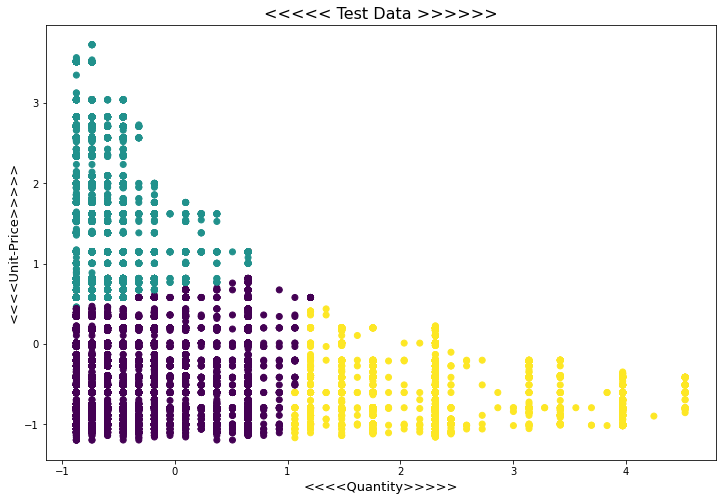

In [97]:
# for test data 
plt.figure(figsize=(12,8))
plt.scatter(test['Quantity'],test['UnitPrice'],c=test['clusters'])
plt.xlabel('<<<<Quantity>>>>>',fontsize=13)
plt.ylabel('<<<<Unit-Price>>>>>',fontsize=13)
plt.title('<<<<< Test Data >>>>>>',fontsize=16)

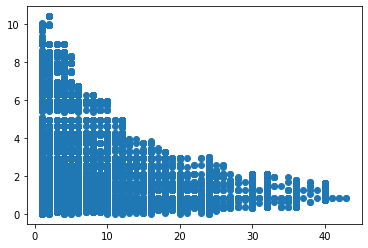

In [94]:
plt.scatter(data['Quantity'],data['UnitPrice'])